In [3]:
# analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 内嵌画图
%matplotlib inline

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [79]:
# XGB
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

In [91]:
# 获取数据
train_df = pd.read_excel("D:/学习/数学建模/2020年重庆邮电大学数学建模竞赛题目/2020年重庆邮电大学数学建模竞赛题目/B题夹/B题附件2.xlsx")

In [92]:
train_df = train_df.drop(columns=["序号"])

In [93]:
train_df.columns=['A','B','C','D','a']

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
A    234 non-null int64
B    234 non-null int64
C    234 non-null int64
D    219 non-null float64
a    234 non-null int64
dtypes: float64(1), int64(4)
memory usage: 9.2 KB


In [95]:
# 平均值填充
D_mean = round(train_df.mean())[4]
t1 = train_df.fillna({'D':D_mean})

In [97]:
for index, row in t1.iterrows():
    if(t1.loc[index][4] < 60):
        t1 = t1.drop(index=index)
        continue
    if(abs(t1.loc[index][0] - t1.loc[index][4]) > 20):
        t1 = t1.drop(index=index)
        continue
    if(abs(t1.loc[index][1] - t1.loc[index][4]) > 20):
        t1 = t1.drop(index=index)
        continue
    if(abs(t1.loc[index][2] - t1.loc[index][4]) > 20):
        t1 = t1.drop(index=index)
        continue

In [99]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

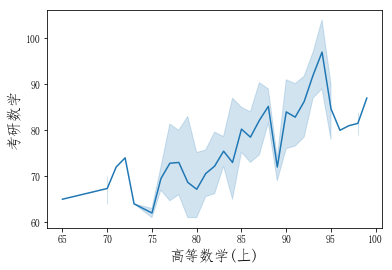

In [100]:
sns.lineplot(t1['A'], t1['a'])
plt.xlabel('高等数学(上)', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./高等数学(上)-考研数学.jpg')

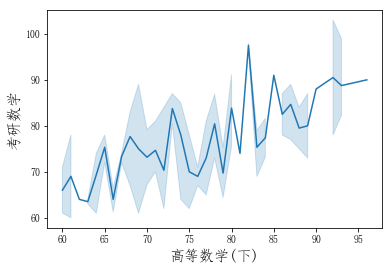

In [101]:
sns.lineplot(t1['B'], t1['a'])
plt.xlabel('高等数学(下)', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./高等数学(下)-考研数学.jpg')

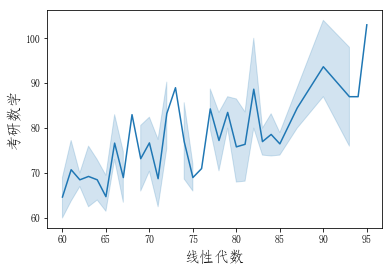

In [102]:
sns.lineplot(t1['C'], t1['a'])
plt.xlabel('线性代数', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./线性代数-考研数学.jpg')

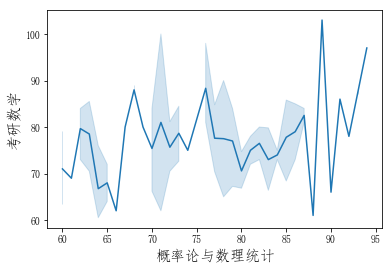

In [103]:
sns.lineplot(t1['D'], t1['a'])
plt.xlabel('概率论与数理统计', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./概率论与数理统计-考研数学.jpg')

In [104]:
traind, val = train_test_split(t1, test_size=0.1, random_state=1)
df_X = traind.iloc[:, :4]
df_Y = traind.iloc[:, 4:]
test_X = val.iloc[:, :4]
test_Y = val.iloc[:, 4:]

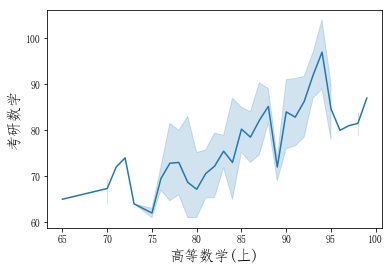

In [105]:
sns.lineplot(t1['A'], t1['a'])
plt.xlabel('高等数学(上)', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./高等数学(上)-考研数学2.jpg')

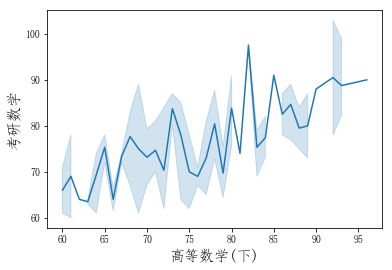

In [106]:
sns.lineplot(t1['B'], t1['a'])
plt.xlabel('高等数学(下)', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./高等数学(下)-考研数学2.jpg')

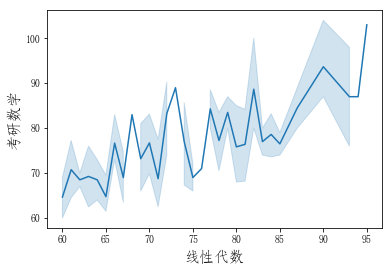

In [107]:
sns.lineplot(t1['C'], t1['a'])
plt.xlabel('线性代数', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./线性代数-考研数学2.jpg')

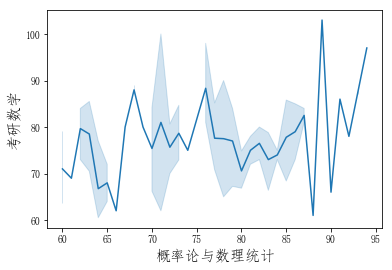

In [108]:
sns.lineplot(t1['D'], t1['a'])
plt.xlabel('概率论与数理统计', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./概率论与数理统计-考研数学2.jpg')

In [109]:
def train_test_df1(train_df):
    df_train, df_test = train_test_split(train_df, test_size=0.1, random_state=0)
    df_train_X = df_train.iloc[:, :4]
    df_train_Y = df_train.iloc[:, 4:]
    df_test_X = df_test.iloc[:, :4]
    df_test_Y = df_test.iloc[:, 4:].values
    
    linreg = LinearRegression()
    model=linreg.fit(df_train_X, df_train_Y)
    predict_Y = linreg.predict(df_test_X)
    acc_linreg = round(linreg.score(df_train_X, df_train_Y) * 100, 2)
    print('linreg:',acc_linreg)
    
    # Gaussian Naive Bayes
    gaussian = GaussianNB()
    gaussian.fit(df_train_X, df_train_Y)
    Y_pred = gaussian.predict(df_test_X)
    acc_gaussian = round(gaussian.score(df_train_X, df_train_Y) * 100, 2)
    print('gaussian:',acc_gaussian)
    
    # Perceptron
    perceptron = Perceptron()
    perceptron.fit(df_train_X, df_train_Y)
    Y_pred = perceptron.predict(df_test_X)
    acc_perceptron = round(perceptron.score(df_train_X, df_train_Y) * 100, 2)
    print('perceptron:',acc_perceptron)
    
    # Linear SVC
    linear_svc = LinearSVC()
    linear_svc.fit(df_train_X, df_train_Y)
    Y_pred = linear_svc.predict(df_test_X)
    acc_linear_svc = round(linear_svc.score(df_train_X, df_train_Y) * 100, 2)
    print('linear_svc:',acc_linear_svc)
    # a1 = list((linreg.predict(df_test_X)))
    # a2 = list(df_test_Y)
    
    # Stochastic Gradient Descent
    sgd = SGDClassifier()
    sgd.fit(df_train_X, df_train_Y)
    Y_pred = sgd.predict(df_test_X)
    acc_sgd = round(sgd.score(df_train_X, df_train_Y) * 100, 2)
    print('sgd:',acc_sgd)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(df_train_X, df_train_Y)
    Y_pred = decision_tree.predict(df_test_X)
    acc_decision_tree = round(decision_tree.score(df_train_X, df_train_Y) * 100, 2)
    print('decision_tree:',acc_decision_tree)

    # 建立一个默认的xgboost回归模型
    reg = XGBRegressor()
    reg.fit(df_X, df_Y)
    y_pred = reg.predict(test_X)
    acc_reg = round(reg.score(df_X, df_Y) * 100, 2)
    print('reg:',acc_reg)  

In [110]:
train_test_df1(t1)

linreg: 43.46
gaussian: 51.65
perceptron: 4.4
linear_svc: 4.4
sgd: 5.49
decision_tree: 100.0
[19:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a

reg: 89.89


In [111]:
# XGB learn
def XGB_learn(train_X, train_y, val_X, val_y):
    dtrain = xgb.DMatrix(train_X, label=train_y)
    dtest = xgb.DMatrix(val_X)
    params = {'booster': 'gbtree',
              'objective': 'reg:logistic',
              'eval_metric': 'auc',
              'max_depth': 5,
              'subsample': 0.6,
              'colsample_bytree': 0.5,
              'eta': 0.01,
              'seed': 2010,
              'silent': 1,
              'eval_metric': 'auc'}
    watchlist = [(dtrain, 'train')]
    bst = xgb.train(params, dtrain, num_boost_round=5, evals=watchlist)

    # 输出概率
    ypred = bst.predict(dtest)
    predictions = [round(value) for value in ypred]
    accuracy = accuracy_score(val_y, predictions)
    
    # show importance of feature
    plot_importance(bst)
    plt.show()
    
    # accuracy
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    return ypred

In [112]:
# 建立一个默认的xgboost回归模型
reg = XGBRegressor()
reg.fit(df_X, df_Y)
y_pred = reg.predict(test_X)
acc_reg = round(reg.score(df_X, df_Y) * 100, 2)
print(acc_reg)
y_pred

[19:36:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
89.89


array([67.416664, 70.31205 , 83.546616, 62.35404 , 82.07729 , 73.91813 ,
       72.72785 , 71.45514 , 69.82758 , 77.48249 , 64.937035],
      dtype=float32)

In [147]:
from pandas.core.frame import DataFrame

pit_X = list((range(60, 101)))
pit_X_orgin = [90 for x in range(60, 101)]
pit_X_A={"A" : pit_X,
   "B" : pit_X_orgin,
   "C" : pit_X_orgin,
   "D" : pit_X_orgin}
pit_X_B={"A" : pit_X_orgin,
   "B" : pit_X,
   "C" : pit_X_orgin,
   "D" : pit_X_orgin}
pit_X_C={"A" : pit_X_orgin,
   "B" : pit_X_orgin,
   "C" : pit_X,
   "D" : pit_X_orgin}
pit_X_D={"A" : pit_X_orgin,
   "B" : pit_X_orgin,
   "C" : pit_X_orgin,
   "D" : pit_X}
dataA=DataFrame(pit_X_A)
dataB=DataFrame(pit_X_B)
dataC=DataFrame(pit_X_C)
dataD=DataFrame(pit_X_D)

In [148]:
y_pred_A = reg.predict(dataA).astype(int)
y_pred_B = reg.predict(dataB)
y_pred_C = reg.predict(dataC)
y_pred_D = reg.predict(dataD)

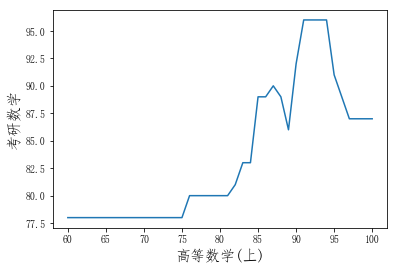

In [153]:
sns.lineplot(dataA['A'], y_pred_A)
plt.xlabel('高等数学(上)', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./高等数学(上)-考研数学3.jpg')

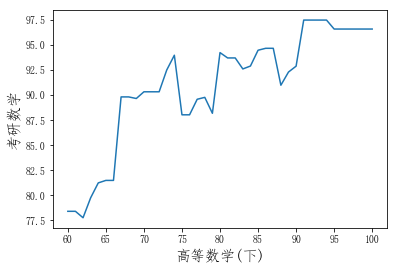

In [154]:
sns.lineplot(dataA['A'], y_pred_B)
plt.xlabel('高等数学(下)', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./高等数学(下)-考研数学3.jpg')

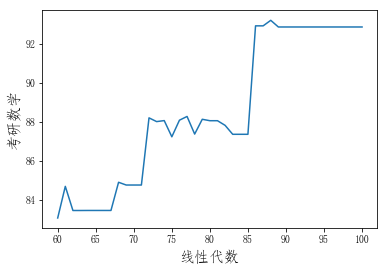

In [155]:
sns.lineplot(dataA['A'], y_pred_C)
plt.xlabel('线性代数', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./线性代数-考研数学3.jpg')

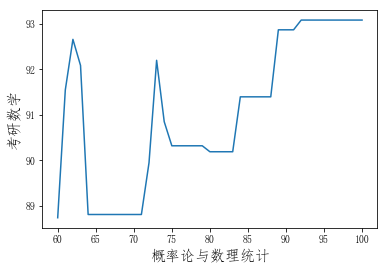

In [156]:
sns.lineplot(dataA['A'], y_pred_D)
plt.xlabel('概率论与数理统计', size= 15)
plt.ylabel('考研数学', size = 15)
plt.savefig('./概率论与数理统计-考研数学3.jpg')

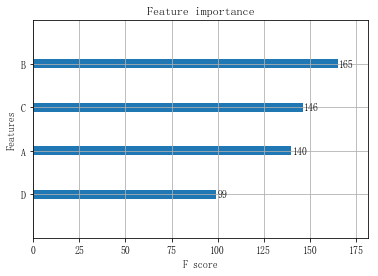

In [113]:
# acc_XGBRegressor = round(XGBRegressor.score(df_X, df_Y) * 100, 2)
plot_importance(reg)
plt.savefig('./feature_importance.jpg')

In [114]:
# 预测前100名学生
sheet = pd.read_excel("D:/学习/数学建模/2020年重庆邮电大学数学建模竞赛题目/2020年重庆邮电大学数学建模竞赛题目/B题夹/B题附件1.xlsx", sheet_name="专业2数据")

In [115]:
sheet.columns=['A','B','C','D','E','F','G','H','I','J','K']
# sheet = sheet.drop(columns=["序号"])
# sheet = sheet.drop(indexs=2)

In [116]:
sheet1 = sheet.iloc[1:, 1:5]

In [117]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 1 to 623
Data columns (total 4 columns):
B    623 non-null object
C    622 non-null object
D    600 non-null object
E    609 non-null object
dtypes: object(4)
memory usage: 19.6+ KB


In [118]:
for column in sheet1.columns:
    sheet1[[column]] = sheet1[[column]].astype(float)

In [119]:
# 平均值填充
sheet_mean = round(sheet1.mean())
t1 = sheet1.fillna({'B':sheet_mean[0], 'C':sheet_mean[1], 'D':sheet_mean[2], 'E':sheet_mean[3]}).iloc[:100, :]
# t1.columns={'a','b','c','d'}
t1 = t1.rename(columns={'B':'A', 'C':'B', 'D':'C', 'E':'D'})
t1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [120]:
y_pred_t1= np.around(reg.predict(t1))
y_pred_t1

array([ 90.,  89.,  85.,  88.,  89.,  90.,  86.,  90.,  83.,  83.,  86.,
        86.,  83.,  85.,  89.,  86.,  89.,  87.,  89.,  81.,  84.,  87.,
        86.,  89.,  84.,  86.,  86.,  91.,  91.,  78.,  91.,  85.,  80.,
        81.,  83.,  81.,  88.,  83.,  81.,  84.,  84.,  83.,  82.,  85.,
        83.,  90.,  76.,  96.,  81.,  82.,  82.,  82.,  99.,  85.,  94.,
        79.,  85.,  88.,  94.,  87.,  98.,  79., 101.,  84.,  83.,  84.,
        94.,  85.,  96.,  88.,  87.,  84.,  86.,  95.,  91.,  95.,  86.,
        98., 100.,  90.,  85.,  99.,  85.,  80.,  90.,  88.,  92.,  97.,
        88.,  82.,  83.,  95.,  83.,  97.,  78.,  84.,  76., 100.,  99.,
        94.], dtype=float32)